### Assigning Wildfire Hazard Potential to CDPs using Zonal Statistics


In [81]:
# import modules
import geopandas as gpd
import rasterio as rio
import rasterstats as rs
from rasterio.plot import show
import matplotlib.pyplot as plt
import pandas as pd

#change default figure size
plt.rcParams['figure.figsize'] = (12,12)

#### Read and inspect CDPs

In [82]:
# read the CDPs shapefile and convert to geodataframe
cdps = gpd.read_file(r"C:\NewMapsPlus\Map698\us-communities-fire\data\cb_2020_us_place_500k.shp")

[(-140.0, -60.0), (20.0, 60.0)]

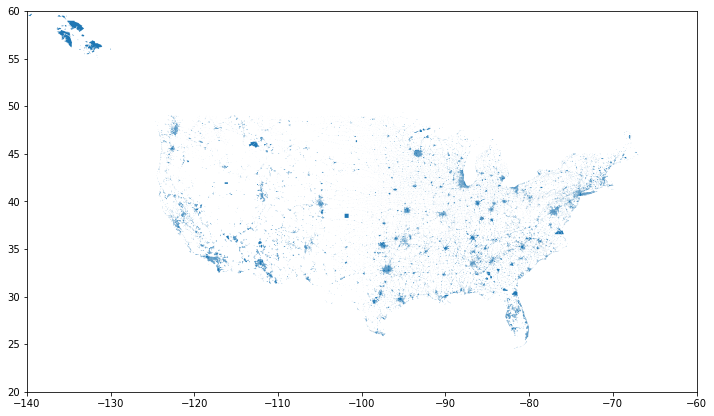

In [83]:
# basic plot of the CDP data
ax = cdps.plot(figsize=(12,12));
ax.set(xlim=(-140,-60), ylim=(20, 60)) # scale the figure with axes values

#### Read and inspect WHP raster

In [84]:
# import the wildfire hzard raster
whp = rio.open(r"C:\NewMapsPlus\Map698\us-communities-fire\data\whp2020_cls_conus.tif")

In [85]:
# verify data type
type(whp)

rasterio.io.DatasetReader

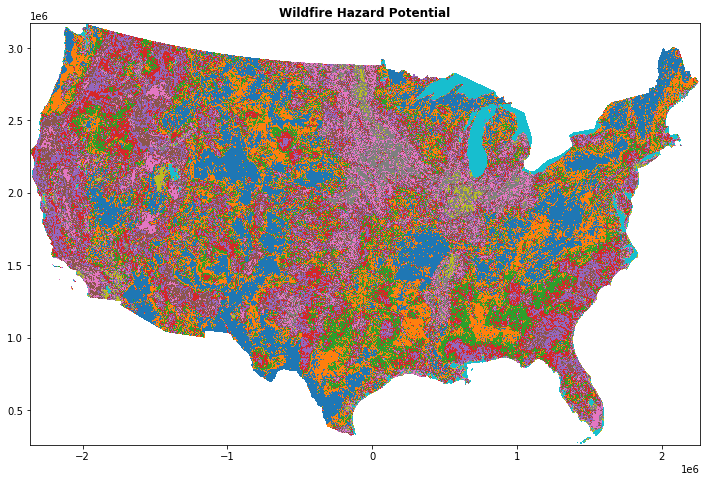

<AxesSubplot:title={'center':'Wildfire Hazard Potential'}>

In [86]:
# plot the raster
show(whp, cmap='tab10', title='Wildfire Hazard Potential')

In [87]:
# get general metadata for raster
whp.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 255.0,
 'width': 17132,
 'height': 10803,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["NAD_1983_Albers",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(270.0, 0.0, -2361825.000000001,
        0.0, -270.0, 3175604.999999998)}

In [88]:
# get info for CDPs GeoDataFrame
cdps.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32188 entries, 0 to 32187
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP     32188 non-null  object  
 1   PLACEFP     32188 non-null  object  
 2   PLACENS     32188 non-null  object  
 3   AFFGEOID    32188 non-null  object  
 4   GEOID       32188 non-null  object  
 5   NAME        32188 non-null  object  
 6   NAMELSAD    32188 non-null  object  
 7   STUSPS      32188 non-null  object  
 8   STATE_NAME  32188 non-null  object  
 9   LSAD        32188 non-null  object  
 10  ALAND       32188 non-null  int64   
 11  AWATER      32188 non-null  int64   
 12  Acres       32188 non-null  float64 
 13  geometry    32188 non-null  geometry
dtypes: float64(1), geometry(1), int64(2), object(10)
memory usage: 3.4+ MB


In [89]:
# get raster crs info 
whp.crs

CRS.from_wkt('PROJCS["NAD_1983_Albers",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [90]:
# get CDPs crs info 
cdps.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [91]:
# project cdps to same CRS as whp
cdps = cdps.to_crs(crs=whp.crs)

In [92]:
# verify crs change
cdps.crs

<Projected CRS: PROJCS["NAD_1983_Albers",GEOGCS["NAD83",DATUM["Nor ...>
Name: NAD_1983_Albers
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

#### NEED TO FIX CDP / WHP OVERLAY PLOT, NOT WORKING PRESENTLY

<AxesSubplot:title={'center':'Wildfire Hazard Potential w/ CDPs'}>

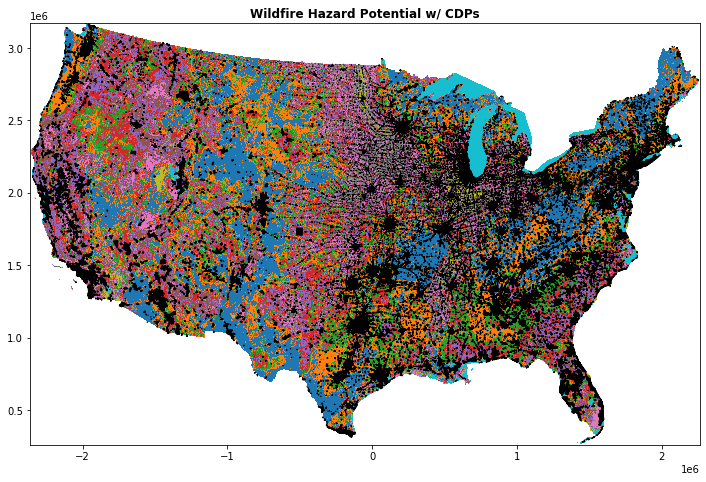

In [93]:
# plot WFH and CDPs together
fig, ax = plt.subplots(1,1, figsize = (12,12))
cdps.plot(ax=ax, facecolor = 'black', edgecolor = 'black', zorder=2)
rio.plot.show(whp, cmap='tab10', ax=ax, title = 'Wildfire Hazard Potential w/ CDPs', zorder=1)

#### Run Zonal Statistics

In [94]:
# assign raster values to numpy and nd array
whp_array = whp.read(1)
affine = whp.transform

In [95]:
# calculate zonal statistics for majoirty of pixel value inside CDP
majority_whp = rs.zonal_stats(cdps, whp_array, affine = affine, stats=['majority'], geojson_out = True)

C:\miniconda3\envs\us-communities-fire\lib\site-packages\rasterstats\io.py:301: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [96]:
# get length of list with majority values, 32188 values
len(majority_whp)

32188

#### Inspect Zonal Statictics Output

This section looks at zonal statistics output, converts them to a list, then ultimately to a DataFrame

In [97]:
# verify what is in properties key value for 0th index, we can see majority value assigned to CDP
majority_whp[0]['properties']

{'AFFGEOID': '1600000US1228575',
 'ALAND': 2728657,
 'AWATER': 0,
 'Acres': 677.216354303,
 'GEOID': '1228575',
 'LSAD': '25',
 'NAME': 'Hampton',
 'NAMELSAD': 'Hampton city',
 'PLACEFP': '28575',
 'PLACENS': '02403791',
 'STATEFP': '12',
 'STATE_NAME': 'Florida',
 'STUSPS': 'FL',
 'majority': 1.0}

In [98]:
# Extract majority value to a list using a while loop
whpcls_cdps = []
i = 0
while i < len(majority_whp):
    whpcls_cdps.append(majority_whp[i]['properties'])
    i = i + 1

In [99]:
# transfer info from list to pandas dataframe
fire_risk_cdps = pd.DataFrame(whpcls_cdps)

In [100]:
# inspect the first 5 records in the data frame to see results of loop and creation of data frame, see majority field
fire_risk_cdps.head()

,AFFGEOID,ALAND,AWATER,Acres,GEOID,LSAD,NAME,NAMELSAD,PLACEFP,PLACENS,STATEFP,STATE_NAME,STUSPS,majority
0,1600000US1228575,2728657,0,677.216354,1228575,25,Hampton,Hampton city,28575,02403791,12,Florida,FL,1.0
1,1600000US1200625,2731534,49685,679.254203,1200625,43,Alford,Alford town,00625,02405131,12,Florida,FL,3.0
2,1600000US1226050,442668,54824,123.896808,1226050,43,Glen Ridge,Glen Ridge town,26050,02406576,12,Florida,FL,1.0
3,1600000US1369000,276730651,12329738,71474.683077,1369000,25,Savannah,Savannah city,69000,02405429,13,Georgia,GA,6.0
4,1600000US1367284,105461127,3308483,26902.799299,1367284,25,Roswell,Roswell city,67284,02404651,13,Georgia,GA,6.0


In [101]:
# inspect subset of fields with majority
fire_risk_cdps[['Acres', 'GEOID', 'NAME', 'STATEFP', 'STATE_NAME', 'STUSPS', 'majority']]

,Acres,GEOID,NAME,STATEFP,STATE_NAME,STUSPS,majority
0,677.216354,1228575,Hampton,12,Florida,FL,1.0
1,679.254203,1200625,Alford,12,Florida,FL,3.0
2,123.896808,1226050,Glen Ridge,12,Florida,FL,1.0
3,71474.683077,1369000,Savannah,13,Georgia,GA,6.0
4,26902.799299,1367284,Roswell,13,Georgia,GA,6.0
...,...,...,...,...,...,...,...
32183,180.158293,3148690,Thayer,31,Nebraska,NE,6.0
32184,585.638686,6919570,Kannat Tabla,69,Commonwealth of the Northern Mariana Islands,MP,NaN
32185,304.456428,4619860,Erwin,46,South Dakota,SD,1.0
32186,1567.210819,0969150,Somers,09,Connecticut,CT,3.0


In [102]:
# get number of rows and columns
fire_risk_cdps.shape

(32188, 14)

In [103]:
# look some values assigned a majority class of 5 or very high fire hazard potential
fire_risk_cdps[fire_risk_cdps.majority == 5]

,AFFGEOID,ALAND,AWATER,Acres,GEOID,LSAD,NAME,NAMELSAD,PLACEFP,PLACENS,STATEFP,STATE_NAME,STUSPS,majority
1348,1600000US1067050,3675898,63711,909.701681,1067050,43,Slaughter Beach,Slaughter Beach town,67050,02391412,10,Delaware,DE,5.0
1537,1600000US3867780,2609731,0,644.368499,3867780,25,Rolette,Rolette city,67780,01036243,38,North Dakota,ND,5.0
1563,1600000US0808950,3596805,0,892.457610,0808950,57,Brook Forest,Brook Forest CDP,08950,02804446,08,Colorado,CO,5.0
1717,1600000US0450000,159565865,34020,39448.238013,0450000,57,North Fork,North Fork CDP,50000,02582832,04,Arizona,AZ,5.0
2506,1600000US0681652,5406010,0,1334.414353,0681652,57,Vallecito,Vallecito CDP,81652,02409394,06,California,CA,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31371,1600000US4169387,379535,35888,102.732731,4169387,57,Sportsmans Park,Sportsmans Park CDP,69387,02804167,41,Oregon,OR,5.0
31422,1600000US0658030,22335059,83617,5530.977534,0658030,57,Pollock Pines,Pollock Pines CDP,58030,02409086,06,California,CA,5.0
31750,1600000US2454925,6804456,20657,1711.416109,2454925,57,Nanticoke,Nanticoke CDP,54925,02583662,24,Maryland,MD,5.0
31852,1600000US0664420,21730446,41137,5396.818000,0664420,57,San Andreas,San Andreas CDP,64420,02409247,06,California,CA,5.0


#### Extract Moderate to Very High Wildfire Hazard Potential from the DataFrame and Inspect the Results

In [104]:
# filter data frame to only show values from 3-5, moderate to very high wildfire hazard potential
fire_risk_cdps = fire_risk_cdps[(fire_risk_cdps['majority'] >= 3) & (fire_risk_cdps['majority'] < 6)]

In [105]:
# print the results of the filter 
print(fire_risk_cdps)

               AFFGEOID     ALAND   AWATER         Acres    GEOID LSAD  \
1      1600000US1200625   2731534    49685    679.254203  1200625   43   
5      1600000US1326084  53117912   265543  13167.536196  1326084   25   
41     1600000US2264100   6260269     7591   1542.210366  2264100   47   
56     1600000US0162328  91711101  2288725  23221.160208  0162328   25   
62     1600000US0139472   2504086     1487    618.880108  0139472   43   
...                 ...       ...      ...           ...      ...  ...   
32085  1600000US4523605   4011824   101296   1012.920702  4523605   57   
32090  1600000US4651340  24710719        0   6105.124643  4651340   57   
32102  1600000US1383084   3389291     9293    840.373728  1383084   25   
32118  1600000US4649500   3463941        0    853.949032  4649500   25   
32186  1600000US0969150   6335310        0   1567.210819  0969150   57   

             NAME         NAMELSAD PLACEFP   PLACENS STATEFP      STATE_NAME  \
1          Alford      Alford t

In [106]:
# look at subset of fields and first 10 rows
fire_risk_cdps[['Acres', 'GEOID', 'NAME', 'STATEFP', 'STATE_NAME', 'STUSPS', 'majority']].head(10)

,Acres,GEOID,NAME,STATEFP,STATE_NAME,STUSPS,majority
1,679.254203,1200625,Alford,12,Florida,FL,3.0
5,13167.536196,1326084,Eatonton,13,Georgia,GA,3.0
41,1542.210366,2264100,Reeves,22,Louisiana,LA,3.0
56,23221.160208,0162328,Prattville,01,Alabama,AL,3.0
62,618.880108,0139472,Kellyton,01,Alabama,AL,3.0
66,10768.614305,0477490,Tusayan,04,Arizona,AZ,4.0
98,28749.494310,1343640,Kingsland,13,Georgia,GA,3.0
102,924.597525,1255875,Penney Farms,12,Florida,FL,3.0
124,1109.790878,3432310,Ho-Ho-Kus,34,New Jersey,NJ,4.0
131,854.307827,3720840,Ellerbe,37,North Carolina,NC,4.0


#### Merge filtered DataFrame with GeoDataFrame

In [115]:
# convert DataFrame to a csv file to keep a copy of tabular data
fire_risk_cdps.to_csv(r'C:\NewMapsPlus\Map698\us-communities-fire\notebooks\data\wfh_345.csv', index=False)

In [116]:
# look at the head of the GeoDataFrame and find a column to join on GEOID is the one
cdps.head()

,STATEFP_x,PLACEFP_x,PLACENS_x,AFFGEOID_x,GEOID,NAME_x,NAMELSAD_x,STUSPS_x,STATE_NAME_x,LSAD_x,...,Acres_y,LSAD_y,NAME_y,NAMELSAD_y,PLACEFP_y,PLACENS_y,STATEFP_y,STATE_NAME_y,STUSPS_y,majority
0,12,00625,02405131,1600000US1200625,1200625,Alford,Alford town,FL,Florida,43,...,679.254203,43,Alford,Alford town,00625,02405131,12,Florida,FL,3.0
1,13,26084,02403537,1600000US1326084,1326084,Eatonton,Eatonton city,GA,Georgia,25,...,13167.536196,25,Eatonton,Eatonton city,26084,02403537,13,Georgia,GA,3.0
2,22,64100,02407535,1600000US2264100,2264100,Reeves,Reeves village,LA,Louisiana,47,...,1542.210366,47,Reeves,Reeves village,64100,02407535,22,Louisiana,LA,3.0
3,01,62328,02404568,1600000US0162328,0162328,Prattville,Prattville city,AL,Alabama,25,...,23221.160208,25,Prattville,Prattville city,62328,02404568,01,Alabama,AL,3.0
4,01,39472,02405933,1600000US0139472,0139472,Kellyton,Kellyton town,AL,Alabama,43,...,618.880108,43,Kellyton,Kellyton town,39472,02405933,01,Alabama,AL,3.0


In [117]:
# merge based on GEOID
cdps = cdps.merge(fire_risk_cdps, on='GEOID')

In [110]:
# inspect the head of the merge
cdps.head()

,STATEFP_x,PLACEFP_x,PLACENS_x,AFFGEOID_x,GEOID,NAME_x,NAMELSAD_x,STUSPS_x,STATE_NAME_x,LSAD_x,...,Acres_y,LSAD_y,NAME_y,NAMELSAD_y,PLACEFP_y,PLACENS_y,STATEFP_y,STATE_NAME_y,STUSPS_y,majority
0,12,00625,02405131,1600000US1200625,1200625,Alford,Alford town,FL,Florida,43,...,679.254203,43,Alford,Alford town,00625,02405131,12,Florida,FL,3.0
1,13,26084,02403537,1600000US1326084,1326084,Eatonton,Eatonton city,GA,Georgia,25,...,13167.536196,25,Eatonton,Eatonton city,26084,02403537,13,Georgia,GA,3.0
2,22,64100,02407535,1600000US2264100,2264100,Reeves,Reeves village,LA,Louisiana,47,...,1542.210366,47,Reeves,Reeves village,64100,02407535,22,Louisiana,LA,3.0
3,01,62328,02404568,1600000US0162328,0162328,Prattville,Prattville city,AL,Alabama,25,...,23221.160208,25,Prattville,Prattville city,62328,02404568,01,Alabama,AL,3.0
4,01,39472,02405933,1600000US0139472,0139472,Kellyton,Kellyton town,AL,Alabama,43,...,618.880108,43,Kellyton,Kellyton town,39472,02405933,01,Alabama,AL,3.0


<AxesSubplot:title={'center':'Wildfire Hazard Potential w/ CDPs'}>

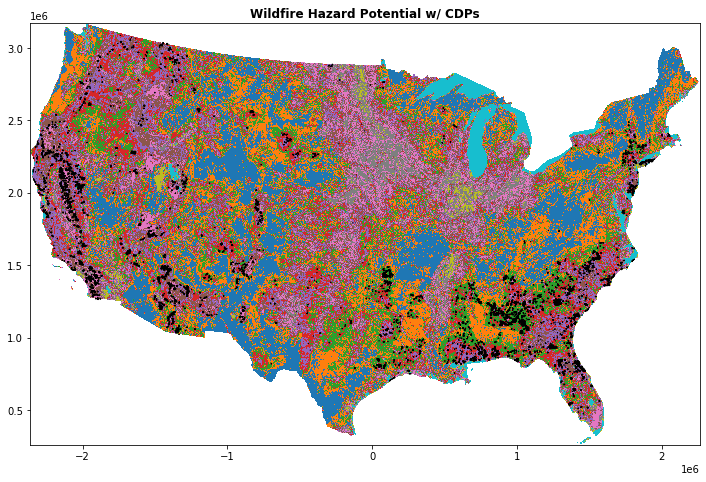

In [118]:
# plot the filtered CDPs and WFH with filtered / joined data
fig, ax = plt.subplots(1,1, figsize = (12,12))
cdps.plot(ax=ax, facecolor = 'black', edgecolor = 'black', zorder=2)
rio.plot.show(whp, cmap='tab10', ax=ax, title = 'Wildfire Hazard Potential w/ CDPs', zorder=1)

#### Output results of analysis to GeoJSON and Shapefile

In [113]:
# convert geodataframe to geojson
cdps.to_file(r'C:\NewMapsPlus\Map698\us-communities-fire\notebooks\data\cdps.geojson', driver='GeoJSON') 

In [114]:
# convert geodataframe to shapefile
cdps.to_file(r'C:\NewMapsPlus\Map698\us-communities-fire\notebooks\data\cdps.shp') 

C:\miniconda3\envs\us-communities-fire\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  
